In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Check for Outliers
from scipy.stats import zscore

# Data Pre-processing
#ROC_AUC only handles binary 0,1 values. Using LabelBinarizer to convert y_test and y_pred
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

# Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

# ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

# Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
df=pd.read_csv('Skyserver.csv')
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null float64
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [5]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Observations:
1. No null values.
2. We don't have any categorical values apart from the target.
3. 10000 rows with 17 features consisting of int and float values.
4. 'rerun' has only one value and can be removed.
5. 'dec', 'plate' and 'fiberid' seems to have outliers.
6. 'specobjid' and 'objid' has values beyond the scope of calculation and must be removed.

In [6]:
for i in df.columns:
    print('#######',i,'#######')
    if df[i].nunique()>15:
        print(df[i].describe())
    else:
        print(df[i].unique())

####### objid #######
[1.23765e+18]
####### ra #######
count    10000.000000
mean       175.529987
std         47.783439
min          8.235100
25%        157.370946
50%        180.394514
75%        201.547279
max        260.884382
Name: ra, dtype: float64
####### dec #######
count    10000.000000
mean        14.836148
std         25.212207
min         -5.382632
25%         -0.539035
50%          0.404166
75%         35.649397
max         68.542265
Name: dec, dtype: float64
####### u #######
count    10000.000000
mean        18.619355
std          0.828656
min         12.988970
25%         18.178035
50%         18.853095
75%         19.259232
max         19.599900
Name: u, dtype: float64
####### g #######
count    10000.000000
mean        17.371931
std          0.945457
min         12.799550
25%         16.815100
50%         17.495135
75%         18.010145
max         19.918970
Name: g, dtype: float64
####### r #######
count    10000.000000
mean        16.840963
std          1.067764
mi

In [7]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [8]:
# Dropping all unwanted columns
df.drop(columns=['objid', 'rerun', 'specobjid'], axis = 1, inplace=True)

Skewness of ra = -1.23
Skewness of dec = 1.19


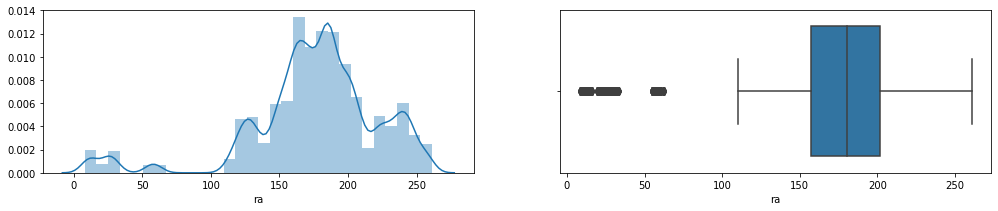

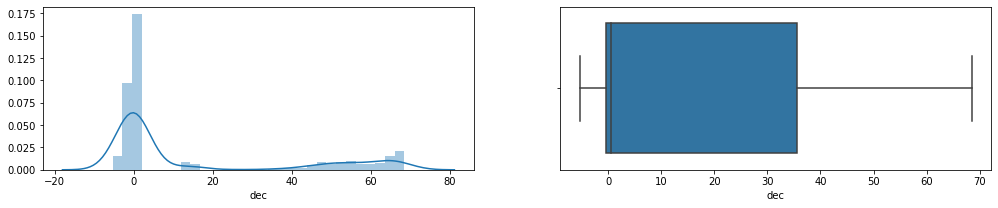

In [9]:
#Univariate analysis 'ra' and 'dec'
for i in ['ra','dec']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

1. 'ra' has outliers below 100
2. 'dec' is skewed slightly to the right

Skewness of u = -1.22
Skewness of g = -0.54
Skewness of r = -0.02
Skewness of i = 0.29
Skewness of z = 0.21


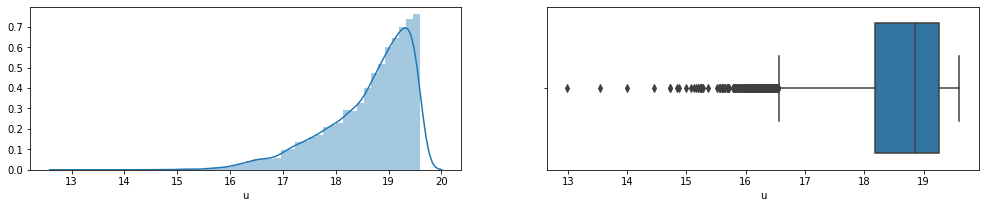

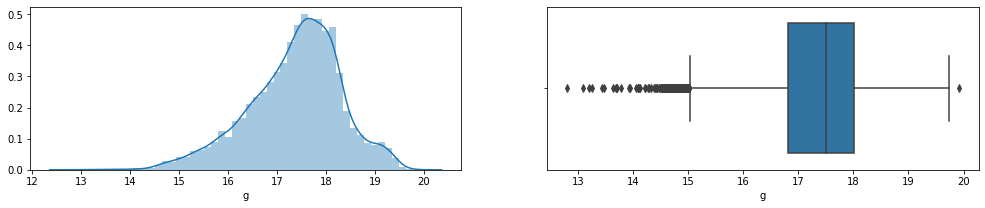

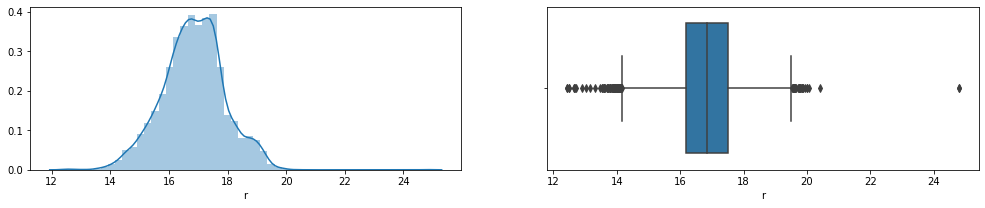

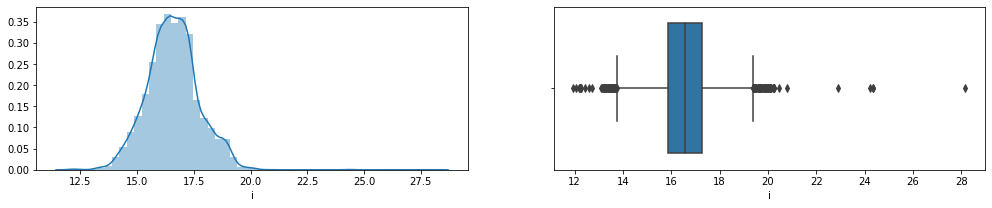

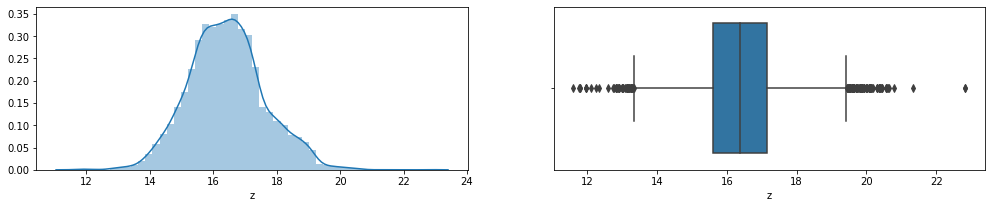

In [10]:
# 'u', 'g', 'r', 'i', 'z' are bands and we can represent them in one chart
bands=['u', 'g', 'r', 'i', 'z']

for i in bands:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i])
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

1. All band values seem to have outliers, but 'r', 'i' and 'z' are normally distributed.
2. Band values 'u' and 'g'seem to be skewed.
Let's find the skewness. If skewness is between -0.5 to +0.5, it is moderately skewed.

Skewness of run = 0.41
Skewness of camcol = -0.10
Skewness of field = 0.25


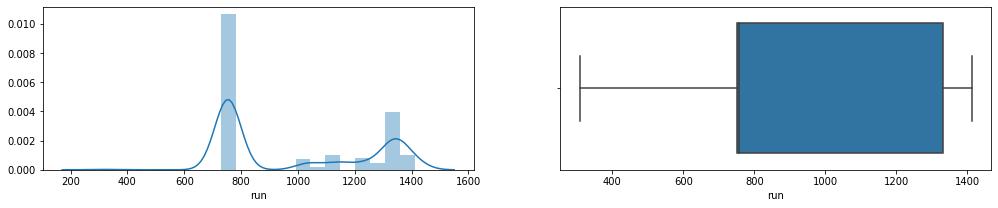

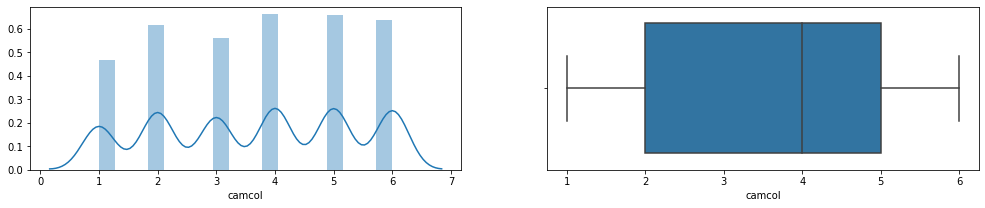

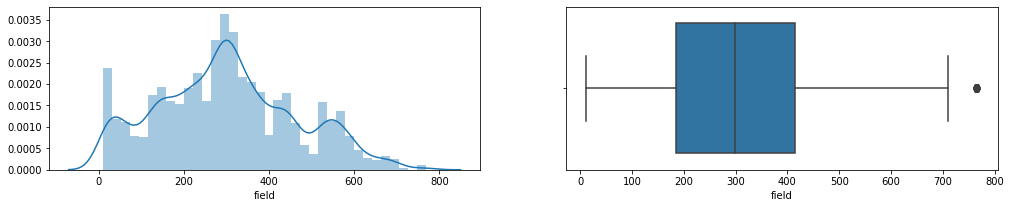

In [11]:
for i in ['run', 'camcol', 'field']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i])
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

['STAR' 'GALAXY' 'QSO']


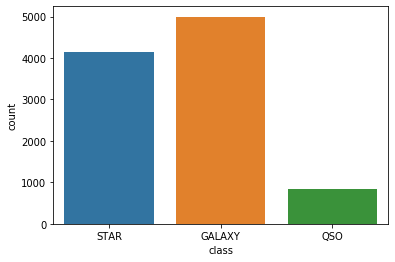

In [12]:
# Target Values
print(df['class'].unique())
sns.countplot(df['class'])

1. QSO values are very less (~ 100) compared to STAR and GALAXY
2. GALAXY has ~1000 values more than STAR & STAR has ~3000 values more than QSO

Skewness of redshift = 4.27
Skewness of plate = 1.79
Skewness of mjd = 1.04
Skewness of fiberid = 0.31


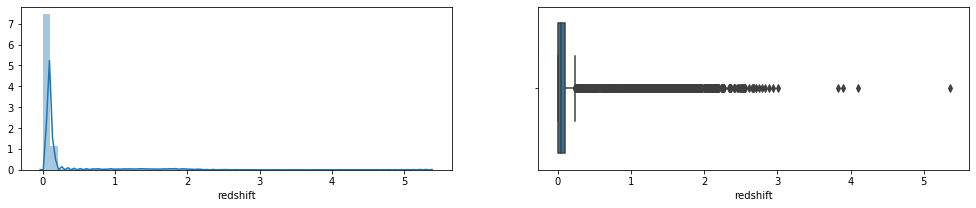

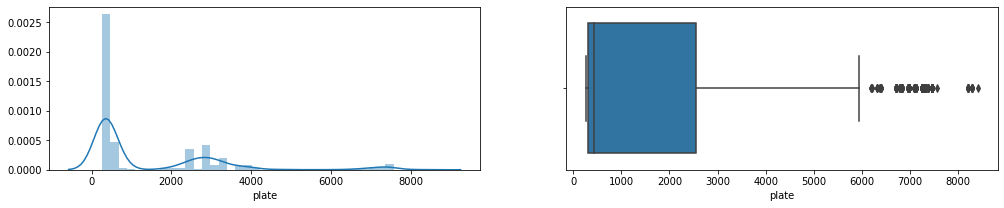

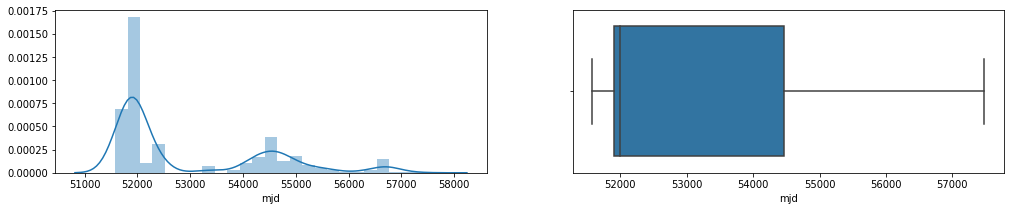

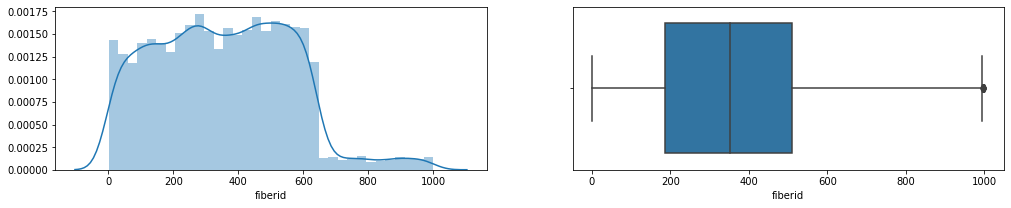

In [13]:
for i in ['redshift', 'plate', 'mjd' ,'fiberid']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i])
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

1. 'redshift', 'plate', 'mjd' is highly skewed
2. 'fiberid' valus are concentrated from 0 to 600 values
3. Majority of 'redshift' is under 0.5

In [14]:
print('Total # of rows in the dataset -->', df.shape[0])
print('Rows with redshift < 0.5 -->', df[df['redshift']<0.5].shape[0])

Total # of rows in the dataset --> 10000
Rows with redshift < 0.5 --> 9311


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D829888>,
      dtype=object)

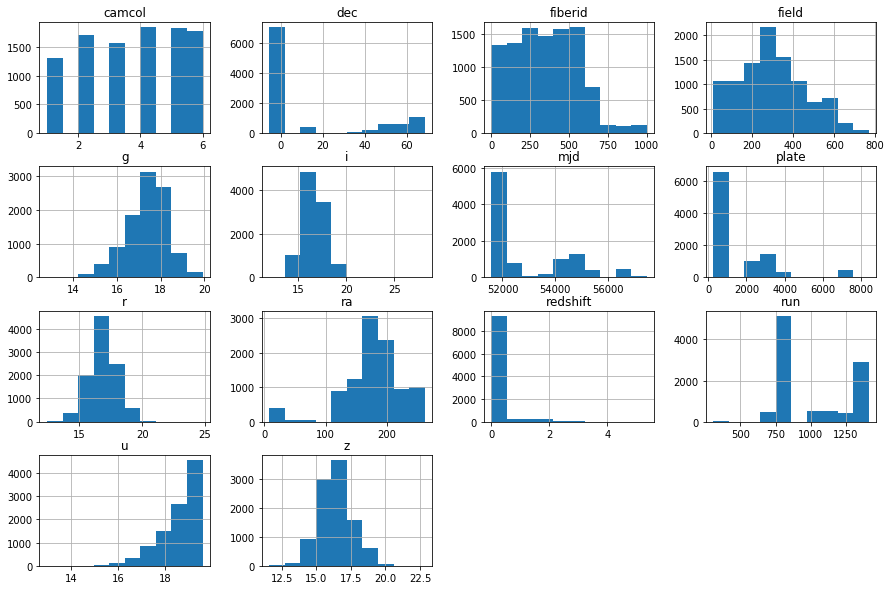

In [15]:
df.hist(figsize=(15,10))

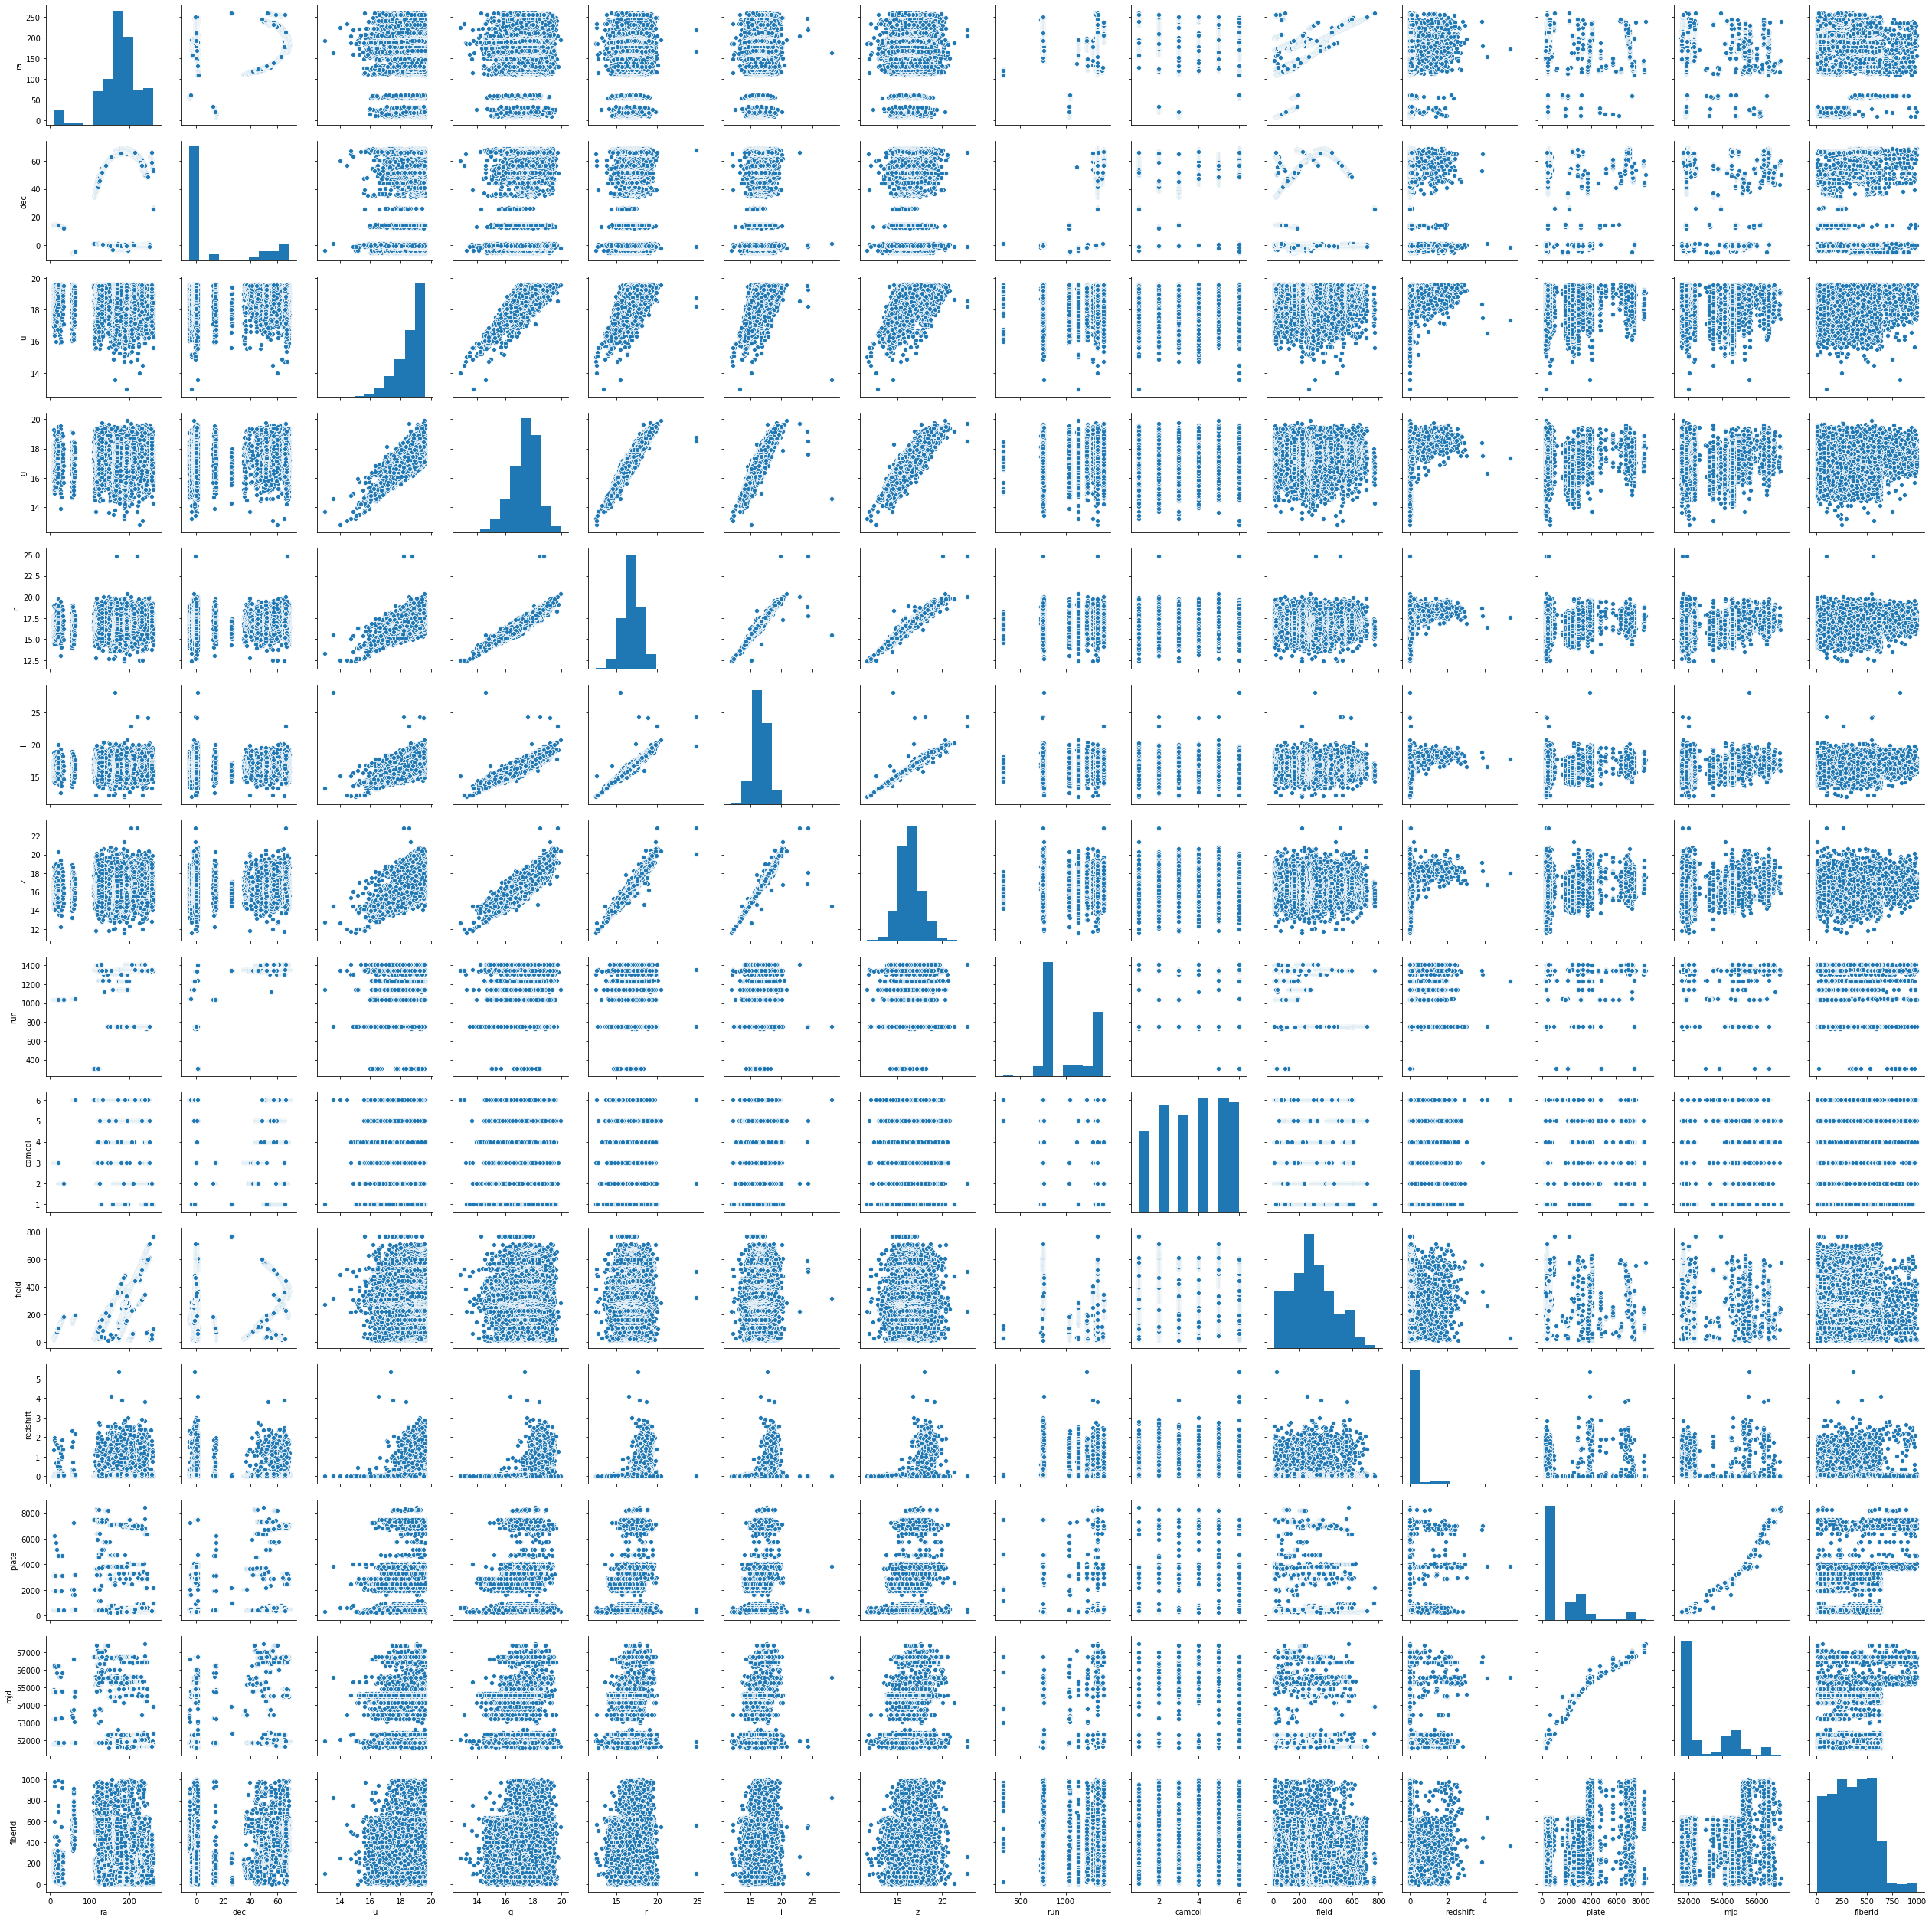

In [16]:
sns.pairplot(df)

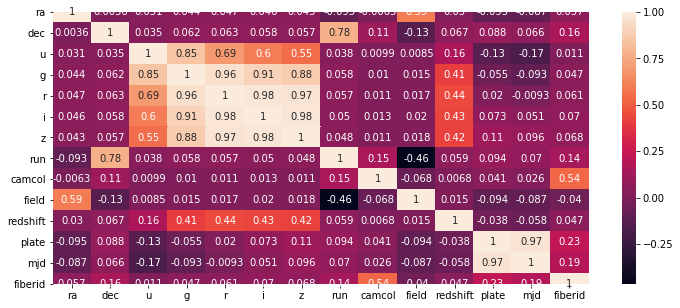

In [17]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot=True)

Observations:
1. All bands are highly correlated.
2. redshift is highly correlated with all the bands.
3. Surprisingly, plate and mjd is highly correlated.
4. Most features are positively correlated.

Bivariate Analysis - Let's understand the various features w.r.t. target 'class'

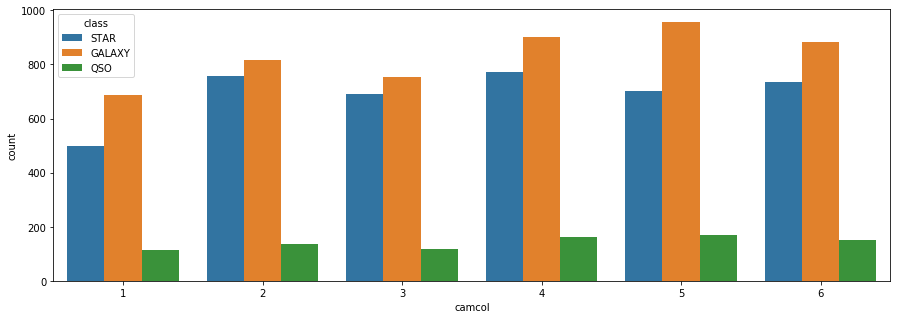

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x='camcol', data=df,hue='class')

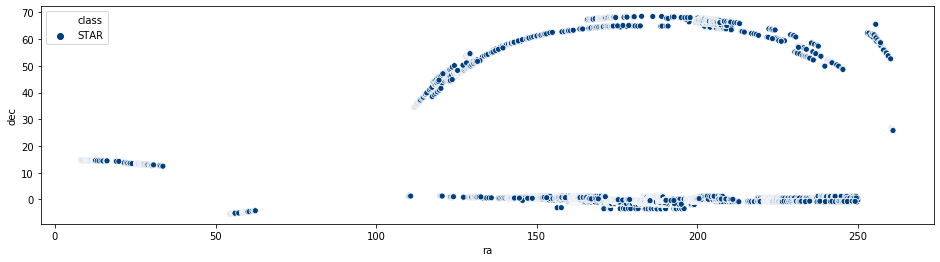

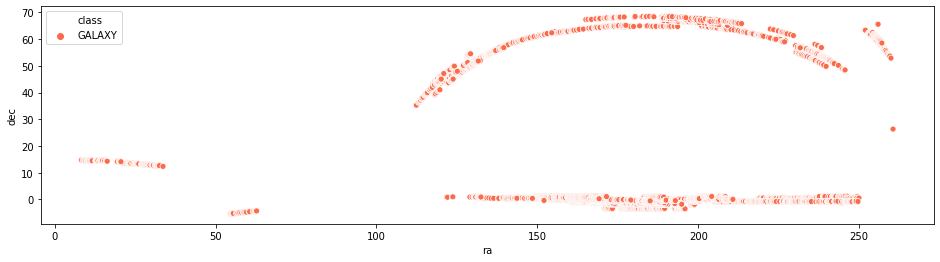

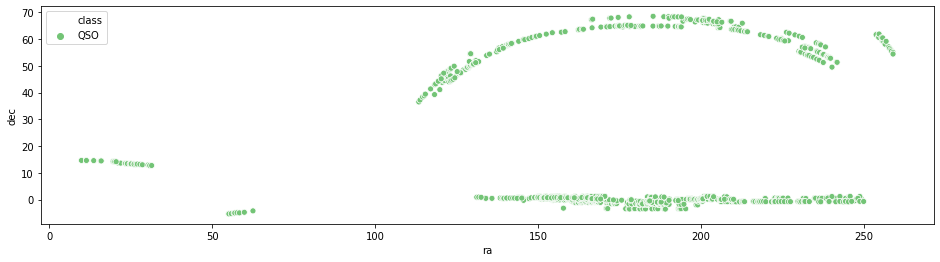

In [19]:
class_star=df[df['class']=='STAR']
class_galaxy=df[df['class']=='GALAXY']
class_qso=df[df['class']=='QSO']
color=['ocean_r', 'Reds_r', 'Greens']
for i, j in enumerate([class_star, class_galaxy, class_qso]):
    plt.figure(figsize=(16,4))
    sns.scatterplot(x='ra',y='dec',hue='class' ,data=j, palette=color[i])

Observations:
    1. All classes follow the same pattern for 'dec'

In [20]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'class',
       'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Let's see the correclation between plate and mjd

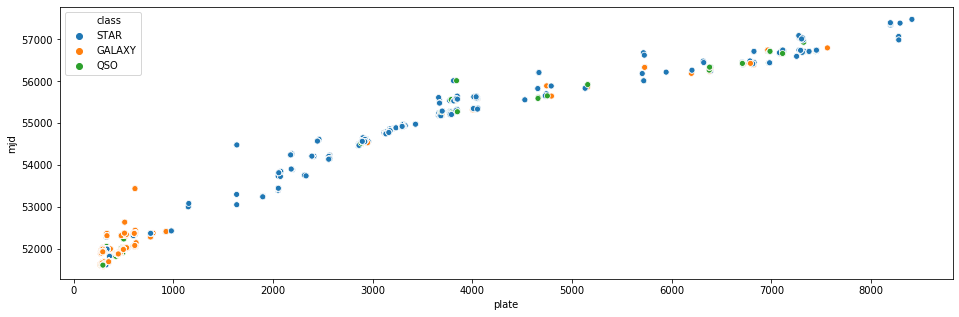

In [21]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='plate',y='mjd',hue='class' ,data=df)

Observations:
    1. Most of the galaxies are visible when the plate was below 1000, between 51578 MJD and 53000 MJD
    2. Further correlation can be found, if we convert MJD to, month and year of Gregorian Calender.

In [22]:
x=df.drop(columns='class', axis=1)
y=df['class']

In [23]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

In [24]:
df.groupby('class').size()

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64

## Machine Learning Algorithms

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print('x_train.shape: ',x_train.shape,'x_test.shape:',x_test.shape,'\ny_train.shape:',y_train.shape,'y_test.shape:',y_test.shape)

x_train.shape:  (8000, 14) x_test.shape: (2000, 14) 
y_train.shape: (8000,) y_test.shape: (2000,)


In [26]:
# Instantiate all models
logr = LogisticRegression()
gnb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier()
bgc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()

In [27]:
models={'Logistic Regression':logr,
        'Gaussian NB':gnb,
        'Support Vector Machine':svc,
        'KNeighbors Classifier':knn,
        'Decision Tree Classifier':dtc,
        'XGB Classifier':xgb,
        'Random Forest Classifier':rf,
        'Bagging Classifier':bgc,
        'Extra Trees Classifier':etc,
        'Gradient Boosting Classifier':gbc
       }

In [28]:
def main(cls):
    a_scores=[]
    for model_name,model in cls.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        score=accuracy_score(y_test,y_pred)
        a_scores.append(score*100)
        print('##############################',model_name,'##############################')
        print('>>> Accuracy Score = %0.2f' %(score*100))
        c_matrix=confusion_matrix(y_test,y_pred)
        print('>>> Confusion Matrix: \n',c_matrix)
        TN,FP,FN,TP=c_matrix[0,0],c_matrix[0,1],c_matrix[1,0],c_matrix[1,1]
        print('>>> Recall Score = %0.2f' %((TP)*100/float(TP+FN)))
        print('>>> Specificity = %0.2f' %(TN*100/float(TN+FP)))
        print('>>> False Positive Rate = %0.2f' %(FP*100/float(FP+TN)))
        print('>>> Precision Score = %0.2f' %(TP*100/float(TP+FP)))
        print('>>> Classification Report:')
        print(classification_report(y_test,y_pred))
    return a_scores

In [29]:
a_scores=main(models)

############################## Logistic Regression ##############################
>>> Accuracy Score = 97.25
>>> Confusion Matrix: 
 [[961   2  33]
 [  8 182   0]
 [  8   4 802]]
>>> Recall Score = 95.79
>>> Specificity = 99.79
>>> False Positive Rate = 0.21
>>> Precision Score = 98.91
>>> Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97       996
         QSO       0.97      0.96      0.96       190
        STAR       0.96      0.99      0.97       814

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

############################## Gaussian NB ##############################
>>> Accuracy Score = 97.05
>>> Confusion Matrix: 
 [[967  23   6]
 [ 10 180   0]
 [  9  11 794]]
>>> Recall Score = 94.74
>>> Specificity = 97.68
>>> False Positive Rate = 2.32
>>> Precision Score = 88.67
>>> Classification Report:

In [30]:
p=pd.DataFrame(data=a_scores,columns=['Accuracy Score'], index=list(models.keys())).sort_values(by = 'Accuracy Score', ascending=False)
print(p)

                              Accuracy Score
XGB Classifier                         99.25
Gradient Boosting Classifier           99.10
Bagging Classifier                     99.05
Random Forest Classifier               99.00
Decision Tree Classifier               98.65
Extra Trees Classifier                 97.55
Logistic Regression                    97.25
Gaussian NB                            97.05
Support Vector Machine                 95.35
KNeighbors Classifier                  89.35


Let's take the top 5 models and perform cross validation

In [31]:
new_models={'XGB Classifier':xgb,
            'Gradient Boosting Classifier':gbc,
            'Random Forest Classifier':rf,
            'Bagging Classifier':bgc,
            'Decision Tree Classifier':dtc
           }

In [32]:
cv_scores=[]
for model_name,model in new_models.items():
    score=cross_val_score(model,x_train,y_train,scoring='accuracy',cv=10)
    cv_scores.append((score.mean())*100)
    print(model_name,' >>> Completed')
print(cv_scores)

XGB Classifier  >>> Completed
Gradient Boosting Classifier  >>> Completed
Random Forest Classifier  >>> Completed
Bagging Classifier  >>> Completed
Decision Tree Classifier  >>> Completed
[99.1125, 98.9125, 98.78750000000001, 98.72500000000001, 98.5375]


In [33]:
pd.DataFrame(data=cv_scores, columns=['New Accuracy Score'], index=list(new_models.keys())).join(p)

,New Accuracy Score,Accuracy Score
XGB Classifier,99.1125,99.25
Gradient Boosting Classifier,98.9125,99.10
Random Forest Classifier,98.7875,99.00
Bagging Classifier,98.7250,99.05
Decision Tree Classifier,98.5375,98.65


Clearly, XGB Classifier is the best model for this dataset with 99.25% accuracy and we can perform Hyperparameter tuning to obtain the best results.

### Hyperparameter Tuning - GridSearchCV

In [34]:
xgb_param = {'learning_rate':[0.1,1],
             'n_estimators':range(50,251,50)
             }

b_xgb=GridSearchCV(xgb,xgb_param)
b_xgb.fit(x_train,y_train)
print('XGB Classifier >>>', b_xgb.best_params_)

XGB Classifier >>> {'learning_rate': 0.1, 'n_estimators': 150}


In [35]:
def multiclass_roc_auc_score(y_test,y_pred):
    lb=LabelBinarizer()
    y_test_new=lb.fit_transform(y_test)
    y_pred_new=lb.fit_transform(y_pred)
    return round(roc_auc_score(y_test_new,y_pred_new)*100,2)

In [36]:
# Instantiating with new parameters
xgb=XGBClassifier(learning_rate=0.1, n_estimators=150)
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print('>>> Accuracy Score = %0.2f' %((accuracy_score(y_test,y_pred))*100))
print('>>> Multiclass_Roc_Auc_Score:',multiclass_roc_auc_score(y_test,y_pred),'%')
print('>>> Classification Report:')
print(classification_report(y_test,y_pred))

>>> Accuracy Score = 99.30
>>> Multiclass_Roc_Auc_Score: 98.85 %
>>> Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      1.00      0.99       996
         QSO       0.98      0.95      0.97       190
        STAR       1.00      1.00      1.00       814

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



With GridSearchCV and hyperparameter tuning, we were able to acheive an accuracy score of 99.30% and Roc_Auc Score of 98.85%

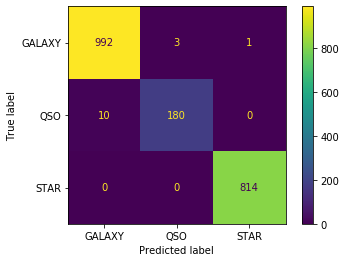

In [37]:
# Plotting Confusion Matrix
xgb.fit(x_train,y_train)
plot_confusion_matrix(xgb, x_test, y_test)

In [38]:
#Exporting model as pkl file
joblib.dump(xgb,'XGB_Skyserver.pkl')

['XGB_Skyserver.pkl']